In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rayudunikhila","key":"b518b08d53f9feeff788263511368d0f"}'}

In [7]:
!ls -lha kaggle.json

-rw-r--r-- 1 root root 69 Feb  8 08:04 kaggle.json


In [8]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
!pwd

/content


In [9]:
!kaggle datasets list

ref                                                                title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/apple-quality                                     Apple Quality                                      170KB  2024-01-11 14:31:07          10321        244  1.0              
shiivvvaam/top-youtuber-worldwide                                  Top YouTubers Worldwide                             83KB  2024-02-05 09:33:23            590         34  1.0              
hummaamqaasim/jobs-in-data                                         Jobs and Salaries in Data Science                   76KB  2023-12-25 20:03:32          15766        269  1.0              
saketk511/2019-2024-us-stock-market-data          

In [10]:
!kaggle datasets list -s "medical"

ref                                                                title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
mirichoi0218/insurance                                              Medical Cost Personal Datasets                   16KB  2018-02-21 00:15:14         227312       2511  0.88235295       
tboyle10/medicaltranscriptions                                     Medical Transcriptions                             5MB  2018-10-15 17:44:11          13117        181  0.85294116       
kmader/siim-medical-images                                         CT Medical Images                                250MB  2017-05-23 07:03:06          38498        770  0.7647059        
andrewmvd/medical-mnist                                     

In [11]:
!kaggle datasets download -d harishkumardatalab/medical-insurance-price-prediction

  0% 0.00/31.6k [00:00<?, ?B/s]
100% 31.6k/31.6k [00:00<00:00, 38.0MB/s]


In [12]:
!unzip medical-insurance-price-prediction.zip

Archive:  medical-insurance-price-prediction.zip
  inflating: Medical_insurance.csv   


In [13]:
!ls

drive  kaggle.json  Medical_insurance.csv  medical-insurance-price-prediction.zip  sample_data


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
insurance_data = pd.read_csv("/content/Medical_insurance.csv")

In [16]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [17]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [18]:
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [19]:
insurance_data.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


In [20]:
import seaborn as sns

<Figure size 800x800 with 0 Axes>

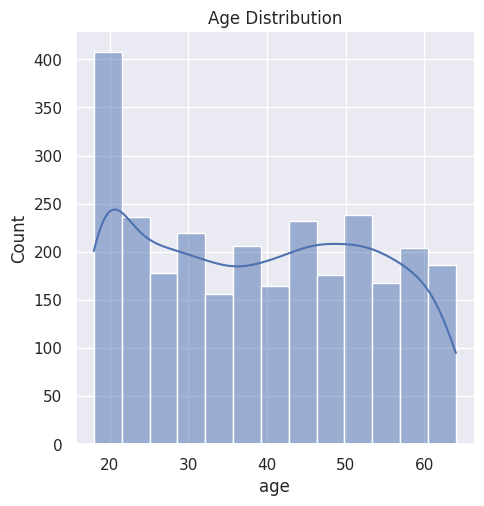

In [21]:
sns.set()
plt.figure(figsize = (8,8))
sns.displot(insurance_data['age'], kde = True)
plt.title("Age Distribution")
plt.show()

<Figure size 800x800 with 0 Axes>

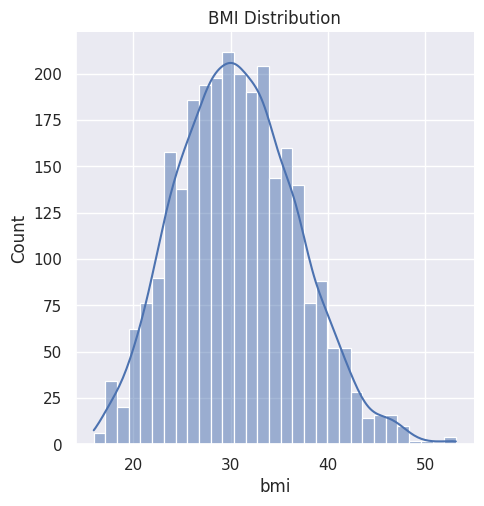

In [22]:
sns.set()
plt.figure(figsize = (8,8))
sns.displot(insurance_data['bmi'], kde = True)
plt.title("BMI Distribution")
plt.show()

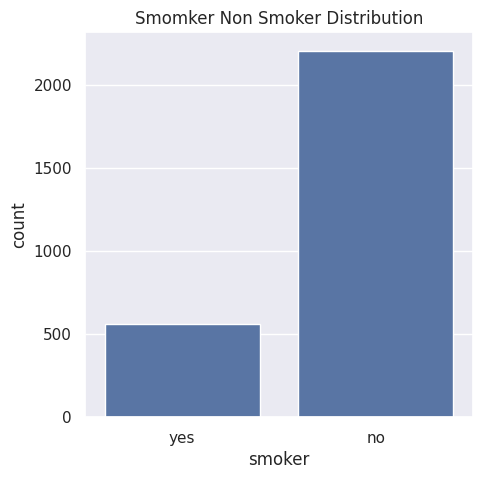

In [23]:
plt.figure(figsize = (5, 5))
sns.countplot(x = "smoker", data = insurance_data)
plt.title("Smomker Non Smoker Distribution")
plt.show()

<Figure size 800x800 with 0 Axes>

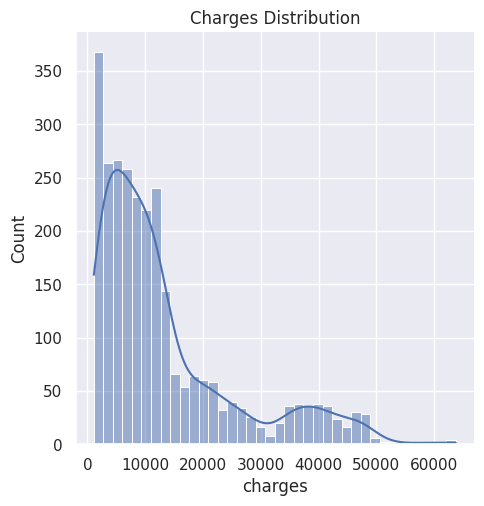

In [24]:
sns.set()
plt.figure(figsize = (8,8))
sns.displot(insurance_data['charges'], kde = True)
plt.title("Charges Distribution")
plt.show()

In [25]:
insurance_data.replace({"sex": {"male": 1, "female": 0}}, inplace = True)
insurance_data.replace({"smoker": {"yes": 1, "no": 0}}, inplace = True)
insurance_data.replace({"region": {"southeast": 0, "southwest": 1, "northeast": 2, "northwest": 3}}, inplace = True)

In [26]:
insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
2767,47,0,45.320,1,0,0,8569.86180
2768,21,0,34.600,0,0,1,2020.17700
2769,19,1,26.030,1,1,3,16450.89470
2770,23,1,18.715,0,0,3,21595.38229


In [27]:
X = insurance_data.drop(columns = "charges", axis = 1)
Y = insurance_data["charges"]

In [28]:
print(X)
print(Y)

      age  sex     bmi  children  smoker  region
0      19    0  27.900         0       1       1
1      18    1  33.770         1       0       0
2      28    1  33.000         3       0       0
3      33    1  22.705         0       0       3
4      32    1  28.880         0       0       3
...   ...  ...     ...       ...     ...     ...
2767   47    0  45.320         1       0       0
2768   21    0  34.600         0       0       1
2769   19    1  26.030         1       1       3
2770   23    1  18.715         0       0       3
2771   54    1  31.600         0       0       1

[2772 rows x 6 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
2767     8569.86180
2768     2020.17700
2769    16450.89470
2770    21595.38229
2771     9850.43200
Name: charges, Length: 2772, dtype: float64


In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [31]:
print("Total data: ", X.shape)
print("Train data: ", X_train.shape)
print("Test data: ", X_test.shape)

Total data:  (2772, 6)
Train data:  (2217, 6)
Test data:  (555, 6)


In [32]:
print(X_train)
print(Y_train)

      age  sex     bmi  children  smoker  region
1415   31    1  36.300         2       1       1
646    39    1  26.220         1       0       3
2165   53    1  28.880         0       0       3
1344   56    1  40.300         0       0       1
1815   27    0  30.400         3       0       3
...   ...  ...     ...       ...     ...     ...
2514   34    1  32.800         1       0       1
2347   29    0  25.900         0       0       1
1608   32    1  30.800         3       0       1
2541   36    0  22.135         3       0       2
2575   23    0  28.000         0       0       1

[2217 rows x 6 columns]
1415    38711.00000
646      6123.56880
2165     9869.81020
1344    10602.38500
1815    18804.75240
           ...     
2514    14358.36437
2347     3353.28400
1608     5253.52400
2541     7228.21565
2575    13126.67745
Name: charges, Length: 2217, dtype: float64
